In [0]:
%pylab inline
import pandas as pd
import seaborn as sns

In [0]:
!pip install scikit-learn
!pip install seaborn

# ACSE Module 8 - Morning Session 1:

# Linear Regression, Logistic Regression, k-Means, PCA

## Housing Prices Dataset - Linear Regression

I know that you’ve always dreamed of dominating the housing market. Until now, that was impossible. But with this limited offer you can… got a bit sidetracked there.

We will work with the housing prices dataset from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) which was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. The meanings of the columns are described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- How many houses are included in this dataset?
- How many characteristics of each house are listed?
- Show some descriptive statistics of the dataset (mean/std/quartiles/min/max)
- Do we have missing data?
- Plot Histogram of variable Saleprice
- Cross-plots between Sales Price and two of the continuous variables
- Box-Whisker plot between Sales Price and important discrete variable OverallQual
- Calculate and visualise the matrix of correlation coefficients (repeat for top 15)

Train a linear regression model to predict the _SalePrice_ variable from any other variables.
- Which are the top predictive variables in this model?
- How much of the variance is explained by this model?

Transform the data into it's first two [Principal Components](https://en.wikipedia.org/wiki/Principal_component_analysis) and plot them against each other in a scatter plot. 


## Loading the data

In [216]:
# Download data
!wget https://raw.githubusercontent.com/acse-2019/ACSE-8/master/Implementation/practical_1/morning/Houseprices.csv

--2020-04-28 14:41:35--  https://raw.githubusercontent.com/acse-2019/ACSE-8/master/Implementation/practical_1/morning/Houseprices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘Houseprices.csv.1’

Houseprices.csv.1   100%[===================>] 449.88K  --.-KB/s    in 0.06s   

2020-04-28 14:41:35 (7.05 MB/s) - ‘Houseprices.csv.1’ saved [460676/460676]



In [0]:
houses = pd.read_csv('./Houseprices.csv')

In [218]:
type(houses)

pandas.core.frame.DataFrame

In [219]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### How many houses are included in this dataset?

In [220]:
print(len(houses.index))

1460


In [221]:
houses.shape

(1460, 81)

### How many characteristics of each house are listed?
i.e. how many features do we have?

In [222]:
print(houses.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

Reminder: The meanings of the columns are described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

### Show some descriptive statistics of the dataset, i.e. statistics that summarize the central tendency, dispersion and shape of the dataset’s distribution

In [13]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
print(houses['OverallQual'].describe()) # Rates the overall material and finish of the house

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


In [17]:
print(houses['GrLivArea'].describe()) # Above grade (ground) living area square feet

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


In [18]:
print(houses['GarageCars'].describe()) # GarageCars: Size of garage in car capacity

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


In [19]:
print(houses['GarageArea'].describe()) # GarageArea: Size of garage in square feet

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


In [20]:
print(houses['TotalBsmtSF'].describe()) # TotalBsmtSF: Total square feet of basement area

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [21]:
print(houses['1stFlrSF'].describe()) # 1stFlrSF: First Floor square feet

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


In [22]:
print(houses['FullBath'].describe()) # FullBath: Full bathrooms above ground

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


In [23]:
print(houses['TotRmsAbvGrd'].describe()) # TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


In [25]:
print(houses['YearBuilt'].describe()) # YearBuilt: Original construction date

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


In [26]:
print(houses['YearRemodAdd'].describe()) # YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


In [27]:
print(houses['GarageYrBlt'].describe()) # GarageYrBlt: Year garage was built

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [28]:
print(houses['MasVnrArea'].describe()) # MasVnrArea: Masonry veneer area in square feet

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [29]:
print(houses['Fireplaces'].describe()) # Fireplaces: Number of fireplaces

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


In [30]:
print(houses['BsmtFinSF1'].describe()) # BsmtFinSF1: Type 1 finished square feet

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


### Do we have missing data?

In [32]:
total        = houses.isnull().sum().sort_values(ascending=False)
percent      = (houses.isnull().sum()/houses.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('\n'*2)
print('Missing Data Summary:')
print(missing_data.head(20))




Missing Data Summary:
              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000


In [38]:
houses.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [40]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Plot Histogram of variable Saleprice

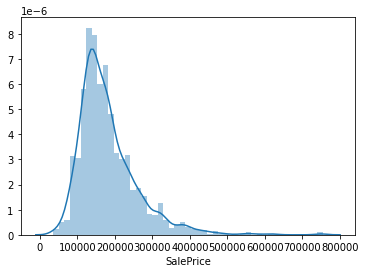

In [223]:
sns.distplot(houses['SalePrice']);

### Cross-plots between Sales Price and two of the continuous variables

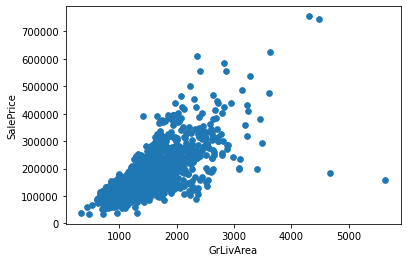

In [53]:
# Method 1: We can either create a new DataFrame
data = pd.concat([houses['SalePrice'], houses['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', s=32)

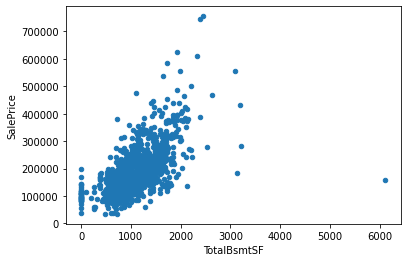

In [59]:
# Method 2: Directly plot from the existing dataframe
houses.plot.scatter(x='TotalBsmtSF', y='SalePrice')

### Box-Whisker plot between Sales Price and important discrete variable OverallQual

(-0.5, 9.5, 0.0, 800000.0)

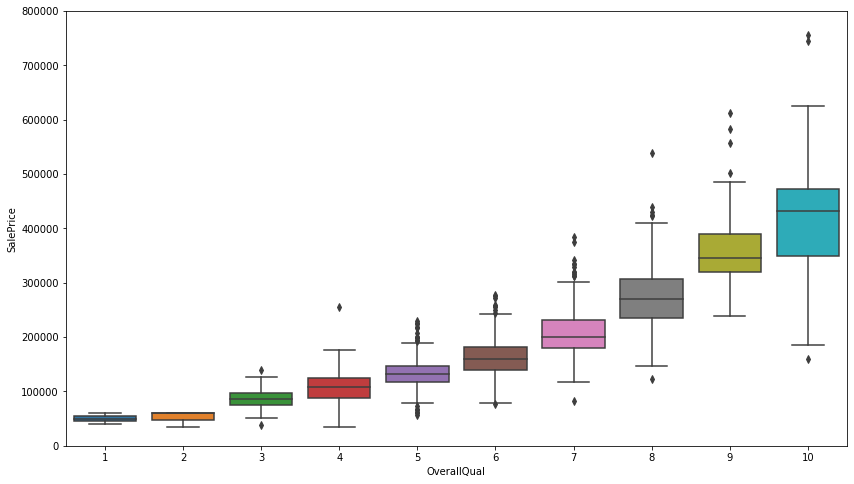

In [224]:
data = pd.concat([houses['SalePrice'], houses['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

### Calculate and Visualize matrix of correlation coefficents

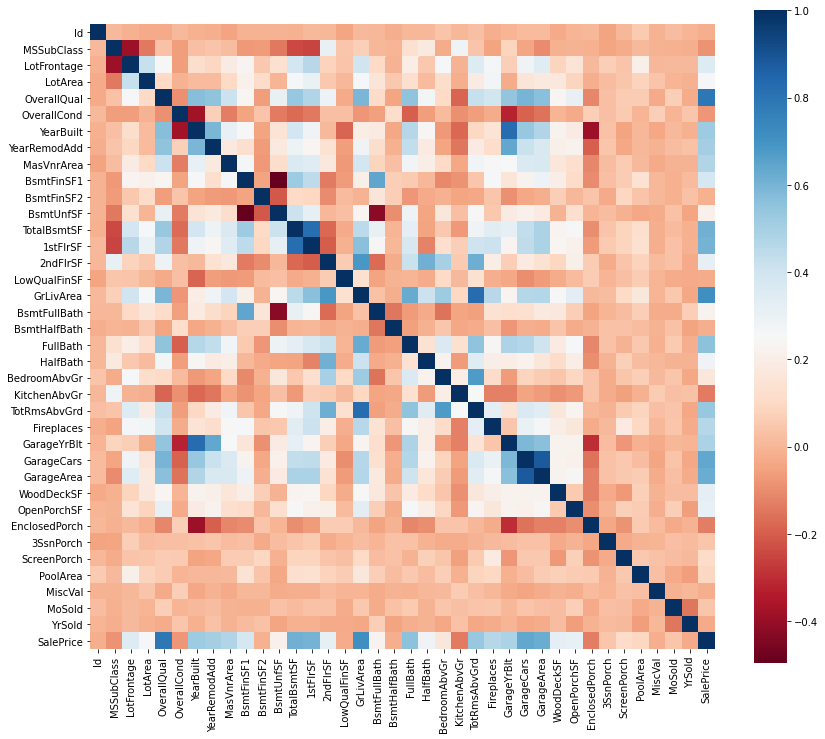

In [225]:
plt.figure(figsize=(14, 12))
sns.heatmap(houses.corr(), cmap=plt.cm.RdBu, square=True)


### Now Calculate and Visualize matrix of correlation coefficents for top variables

In [78]:
k = 15
cols  = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

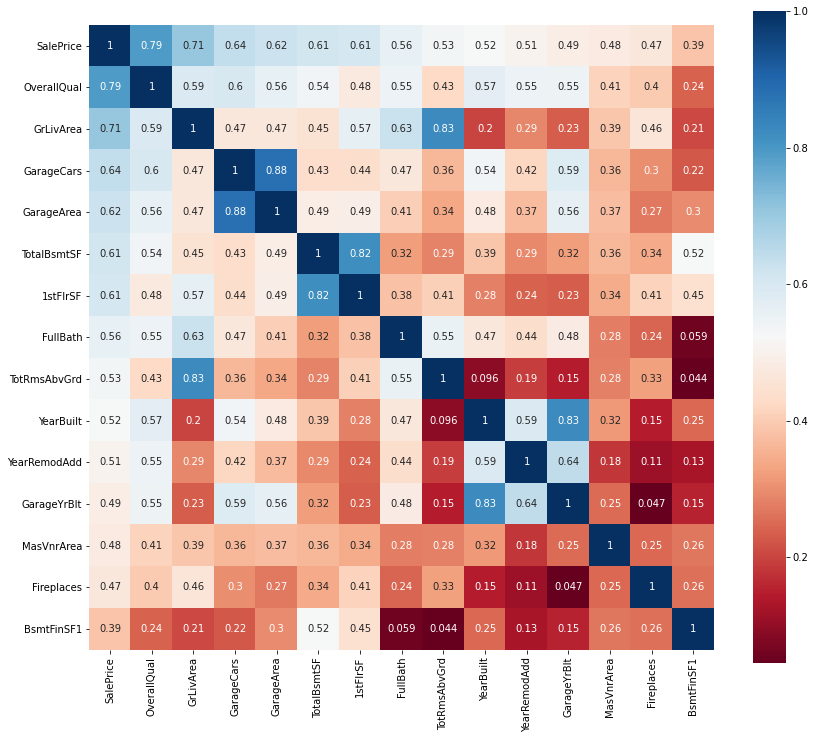

In [227]:
plt.figure(figsize=(14, 12))
sns.heatmap(houses[cols].corr(), cmap=plt.cm.RdBu, square=True, annot=True)

### Linear Regression

R^2= 0.7862742484250567


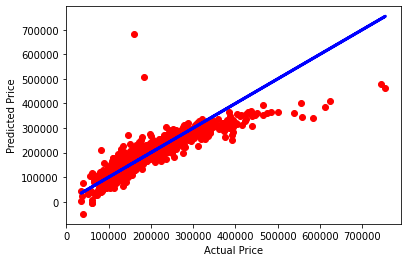

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = houses[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1']]
      
y = houses['SalePrice']

model = LinearRegression(fit_intercept=True)
X.isnull().sum()
model.fit(X, y)
model.coef_
y_pred=model.predict(X)
print("R^2=", r2_score(y, y_pred))
plt.scatter(y, y_pred, c="red")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot(y,y, color='blue', linewidth=3)



### Principal Component Analysis

In [130]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

X        = houses[["OverallQual", "GrLivArea", "GarageCars","GarageArea","TotalBsmtSF","1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]]
Xarray   = X.values
"""
Normalize the data (this has an enormous impact on the results and it is mandatory 
to interpret the coordinates of the principal components in the feature space)
"""
Xscaled  = preprocessing.scale(Xarray)
"""
This implementation makes all the variables centered at zero but does not rescale them, so we need to rescale them in order for the coordinates of th
principal components to be interpretable
"""
pca     = PCA(n_components=2)
X_pca   = pca.fit_transform(Xscaled)
print   ('Explained Variance:', pca.explained_variance_ratio_)
print   ('\n'*3, 'Coordinates in Feature Space of two first PCA Components:','\n',pca.components_)

Explained Variance: [0.54174041 0.14554243]



 Coordinates in Feature Space of two first PCA Components: 
 [[ 0.36659077  0.35858194  0.3594073   0.3544261   0.32454453  0.33423272
   0.32562242  0.29379568  0.26991149]
 [-0.10004053  0.45752602 -0.2941873  -0.29010898 -0.10849868  0.05880224
   0.18084867  0.57295584 -0.48346473]]


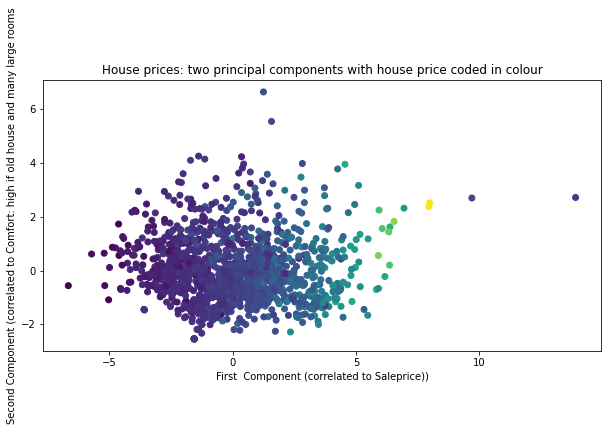

In [137]:
"""
Create numpy array y from dataframe and convert it to integer to label colors in plot
"""
y       = houses[["SalePrice"]].values
y       = y/25000.

plt.figure  (figsize=(10, 5))
plt.scatter (X_pca[:, 0], X_pca[:, 1], c=y[:,0])
plt.xlabel('First  Component (correlated to Saleprice))')
plt.ylabel('Second Component (correlated to Comfort: high if old house and many large rooms')
plt.title ('House prices: two principal components with house price coded in colour')
plt.show()

# Breast Cancer Dataset

Let's try another dataset - the breast cancer dataset. This dataset is so popular that scikit-learn (the python package we are using for simple analyses) includes it out of the box. 

With this data loaded, write code for the following objectives:
- How many samples and features are present in the dataset?
- What are the names of the features present?
- Print any two rows from the dataset
- Identify the two most predictive features
- Plot the data as a scatter chart along these two features axes
- Train a logistic regression classifier to predict the state of the tumour (Benign/Metastatic) from the given 30 features
- Carry out a PCA analysis and plot the data along the first two principal components
- Train another Logistic Regression classifier that works in the PCA domain (compare with previous)
- Ignoring the labels, carry out (unsupervised) K-means clustering of the training data with 2 clusters. Interpret the resulting clusters as class labels and report the accuracy of this method. 

In [0]:
from sklearn.datasets import load_breast_cancer


X, y = load_breast_cancer(return_X_y=True)
data = load_breast_cancer()

In [232]:
X.shape

(569, 30)

In [233]:
y.shape

(569,)

In [236]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [237]:
"""
Print the 30 features and class of the 2 first lines in the dataset
""" 
for index in range (2): 
    print("Row:", (index+1), "Feature values:", X[index,:], "Class:", y[index,], "\n"*2)

Row: 1 Feature values: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] Class: 0 


Row: 2 Feature values: [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02] Class: 0 




Of the 30 features, which ones are more and less predictive of the outcome?

In [238]:
data.feature_names[23]

'worst area'

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(X.shape[1]):
  clf = LogisticRegression()
  clf.fit(X[:, i].reshape(-1, 1), y)
  y_pred = clf.predict(X[:, i].reshape(-1, 1))
  a = accuracy_score(y, y_pred)
  print("For feature %d, accuracy=%f" % (i, a))


For feature 0, accuracy=0.878735
For feature 1, accuracy=0.704745
For feature 2, accuracy=0.882250
For feature 3, accuracy=0.884007
For feature 4, accuracy=0.627417
For feature 5, accuracy=0.688928
For feature 6, accuracy=0.792619
For feature 7, accuracy=0.678383
For feature 8, accuracy=0.627417
For feature 9, accuracy=0.627417
For feature 10, accuracy=0.799649
For feature 11, accuracy=0.627417
For feature 12, accuracy=0.794376
For feature 13, accuracy=0.866432
For feature 14, accuracy=0.627417
For feature 15, accuracy=0.627417
For feature 16, accuracy=0.625659
For feature 17, accuracy=0.627417
For feature 18, accuracy=0.627417
For feature 19, accuracy=0.627417
For feature 20, accuracy=0.913884
For feature 21, accuracy=0.720562
For feature 22, accuracy=0.919156
For feature 23, accuracy=0.910369
For feature 24, accuracy=0.627417
For feature 25, accuracy=0.789104
For feature 26, accuracy=0.840070
For feature 27, accuracy=0.836555
For feature 28, accuracy=0.674868
For feature 29, accuracy

So feature indices 22 and 20 are the top predictive features in that order. What characteristics of the tumours do these features represent?

In [0]:
data.feature_names[22]

Now let's plot the data along these two features to visualise it

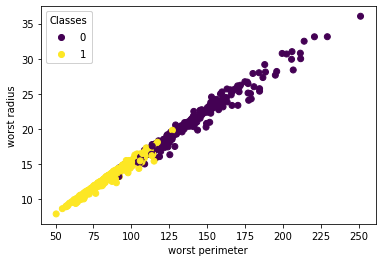

In [241]:
import matplotlib.pyplot as plt
# Boilerplate
fig, ax = plt.subplots()

# The scatter plot, note that we pass c=y which means the class label will be used to decide the colour of the marker
scatter = ax.scatter(X[:, 22], X[:, 20], c=y)

# Add axis labels
plt.xlabel(data.feature_names[22])
plt.ylabel(data.feature_names[20])

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

plt.show()

The data looks very easily seperable along these dimensions. If only we could draw a line across the middle of this plot, we could guess that everything to the right of the line is class 0 and everything to the left is class 1. This is what Logistic Regression does. 

### LOGISTIC REGRESSION

Create a new logistic regression classifier and fit to the whole dataset (no validation or test set), but only features 20 and 22

In [0]:
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_reduced = X[:, [20, 22]]
scaler = StandardScaler()
Xscaled  = scaler.fit_transform(X_reduced)
clf1     = LogisticRegression()
clf1.fit(Xscaled, y)
y_logis1 = clf1.predict(Xscaled)
coef    = clf1.coef_
bias    = clf1.intercept_
xlin     = pylab.linspace(-2, 4, 1000)
ylin     = -(bias[0]+coef[0,0]*xlin)/coef[0,1]



 Accuracy obtained with Logistic Regression: 91.7 percent 



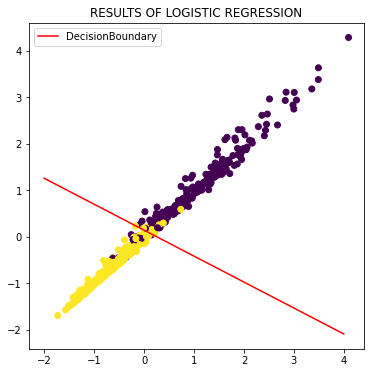

In [243]:
from   sklearn.metrics         import accuracy_score

print('\n'*2,"Accuracy obtained with Logistic Regression: %2.1f percent" % (accuracy_score(y, y_logis1)*100),'\n'*1)
plt.figure  (figsize=(6,6))
plt.scatter(Xscaled[:, 0], Xscaled[:, 1], c=y)
plt.plot    (xlin, ylin, 'r-', label='DecisionBoundary')
plt.title   ('RESULTS OF LOGISTIC REGRESSION')
plt.legend  ()
plt.show    ()

We see that the accuracy obtained by combining the two "best" (but correlated) features is actually lower than the accuracy we obtained from using a single feature. Can we extract "the best" features but also remove their correlation? That's PCA!

### Principal Component Analysis

Create a two-component PCA projection using sklearn's PCA implementation 
and plot on a graph using plt.scatter. Choose the colour of the marker depending on the class of the point.

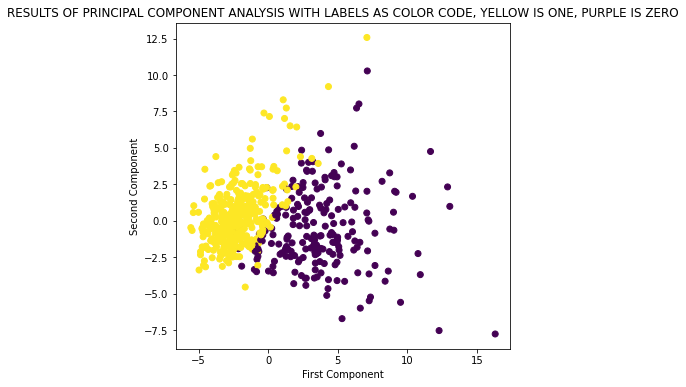

In [244]:
pca = PCA(n_components=2)
scaler = StandardScaler()
Xscaled  = scaler.fit_transform(X)
X_pca = pca.fit_transform(Xscaled)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title ('RESULTS OF PRINCIPAL COMPONENT ANALYSIS WITH LABELS AS COLOR CODE, YELLOW IS ONE, PURPLE IS ZERO')
plt.show()

Now build another logistic regression classifier that works on the PCA domain. 

In [0]:
clf = LogisticRegression()
clf.fit(X_pca, y)
y_pred = clf.predict(X_pca)
coef = clf.coef_
bias = clf.intercept_

Calculate Decision Boundary based on the coefficients provided by LogisticRegression

In [0]:
xlin     = pylab.linspace(-5, 15, 1000)
ylin     = -(bias[0]+coef[0,0]*xlin)/coef[0,1]



 Accuracy obtained with Logistic Regression (PCA): 95.6 percent 



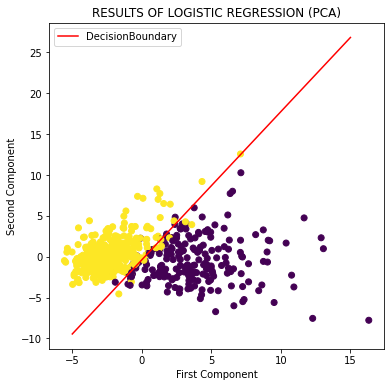

In [247]:
from sklearn.metrics import accuracy_score

print('\n'*2,"Accuracy obtained with Logistic Regression (PCA): %2.1f percent" % (accuracy_score(y, y_pred)*100),'\n'*1)
plt.figure  (figsize=(6,6))
plt.scatter (X_pca[:, 0], X_pca[:, 1], c=y)
plt.plot    (xlin, ylin, 'r-', label='DecisionBoundary')
plt.xlabel  ('First Component')
plt.ylabel  ('Second Component')
plt.title   ('RESULTS OF LOGISTIC REGRESSION (PCA)')
plt.legend  ()
plt.show    ()

Now let's train a logistic regression classifier on all the features, without PCA



In [0]:
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
Xscaled  = scaler.fit_transform(X)
clf     = LogisticRegression()
clf.fit(Xscaled, y)
y_pred = clf.predict(Xscaled)
coef    = clf.coef_
bias    = clf.intercept_
xlin     = pylab.linspace(-2, 4, 1000)
ylin     = -(bias[0]+coef[0,0]*xlin)/coef[0,1]



 Accuracy obtained with Logistic Regression: 98.8 percent 



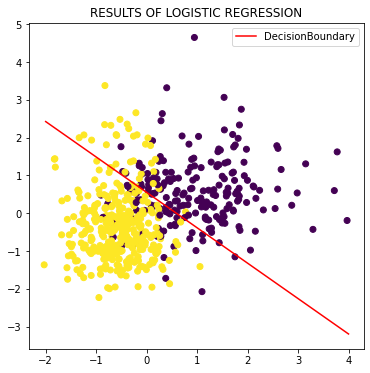

In [249]:
print('\n'*2,"Accuracy obtained with Logistic Regression: %2.1f percent" % (accuracy_score(y, y_pred)*100),'\n'*1)
plt.figure  (figsize=(6,6))
plt.scatter(Xscaled[:, 0], Xscaled[:, 1], c=y)
plt.plot    (xlin, ylin, 'r-', label='DecisionBoundary')
plt.title   ('RESULTS OF LOGISTIC REGRESSION')
plt.legend  ()
plt.show    ()

### K-MEANS CLUSTERING

Carry out K-Means Clustering on the PCA'd cancer dataset and plot the resulting clusters and their centers
Careful that k-Means, being unsupervised, doesn't care about your labels therefore you may need to "flip" 
your labels to get good predictions.

In [250]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=13)
clf.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=13, tol=0.0001, verbose=0)



 Accuracy obtained with K-MEANS: 90.7 percent


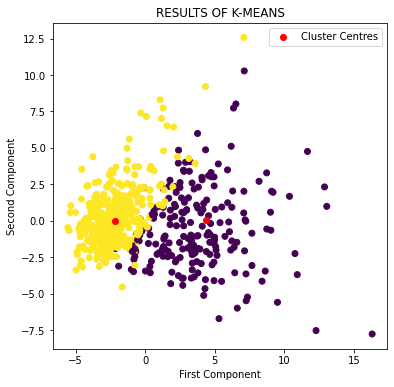

In [251]:

y_kmea = clf.predict(X_pca)


print('\n'*2,"Accuracy obtained with K-MEANS: %2.1f percent" % (accuracy_score(y, y_kmea)*100))
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], c="red", label='Cluster Centres')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title ('RESULTS OF K-MEANS')
plt.legend()
plt.show()